# Part A - Core OpenCV skills

## Q1. Image I/O and Color Spaces

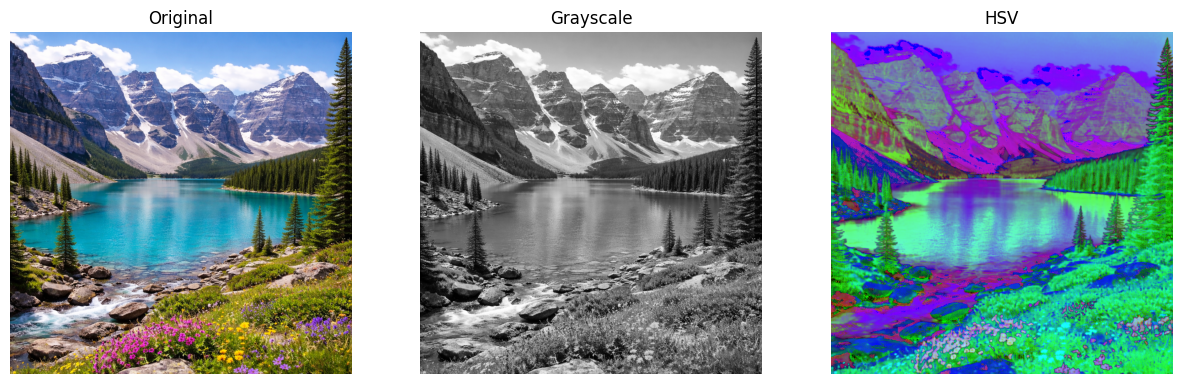

In [2]:
import cv2
import matplotlib.pyplot as plt

# Loading a color image using OpenCV
img = cv2.imread('img.png')
# Converting BGR image to RGB for correct visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Converting to Grayscale and HSV
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Displaying Original, Grayscale, and HSV images side by side using Matplotlib
plt.figure(figsize=(15,5))

# Original Image
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

# Grayscale Image
plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# HSV Image
plt.subplot(1,3,3)
plt.imshow(hsv)
plt.title('HSV')
plt.axis('off')

plt.show()

 Q.1(5) Why does OpenCV read images int BGR instead of RGB?
 
 OpenCV uses BGR instead of RGB mainly for historical compatibility with older image formats and camera hardware.
 
 Using BGR matched the native memory layout, improving performance.
 
 Changing it later would have broken a lot of existing OpenCV code.


## Q2. Histogram Analysis

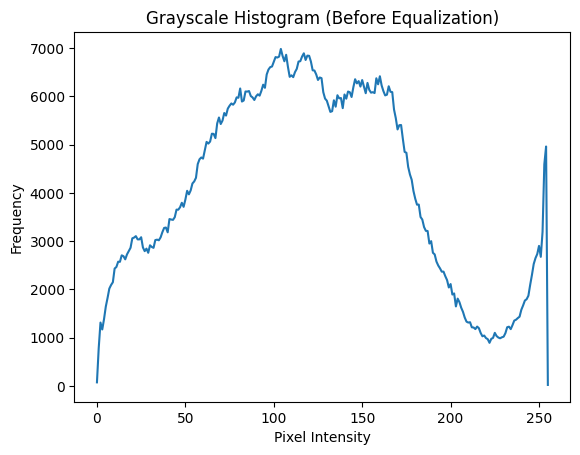

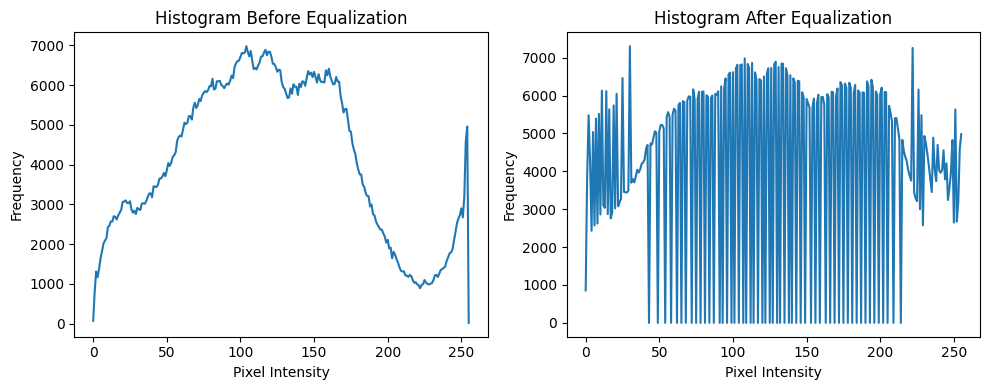

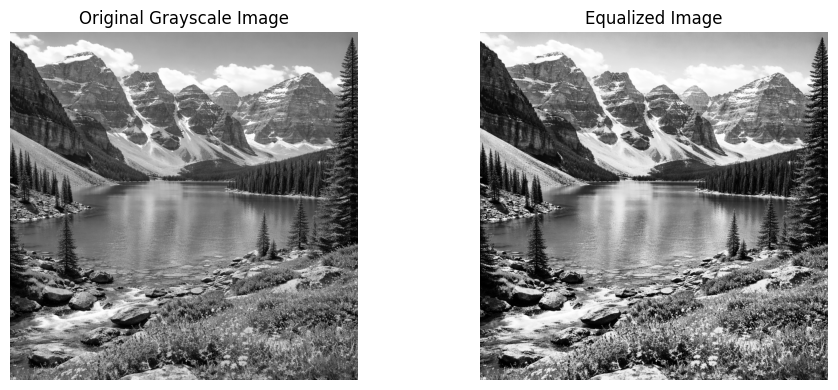

In [3]:
import cv2
import matplotlib.pyplot as plt

# 1. Loading a color image and converting it to grayscale
img = cv2.imread('img.png')     
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Ploting the grayscale histogram using OpenCV
plt.figure()
plt.title("Grayscale Histogram (Before Equalization)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(cv2.calcHist([gray], [0], None, [256], [0, 256]))
plt.show()

# 3. Applying Histogram Equalization
equalized = cv2.equalizeHist(gray)

# 4. Ploting the histogram before and after equalization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Histogram Before Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(cv2.calcHist([gray], [0], None, [256], [0, 256]))

plt.subplot(1, 2, 2)
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(cv2.calcHist([equalized], [0], None, [256], [0, 256]))

plt.tight_layout()
plt.show()

# 5. Displaying both images side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Q2(A). Visible change after histogram equalization:

The image usually looks more contrast-enhanced. Dark regions become clearer, bright regions get better detail, and overall intensity distribution becomes more uniform.

Q2(B) Images where histogram equalization is not useful:

1.Images that already have good contrast

2.Images with very uneven lighting (can amplify noise)

3.Natural color images (direct equalization can distort colors)

4.Images where brightness carries semantic meaning (e.g., medical images)


## Q3. Image Smoothing and Noise Reduction

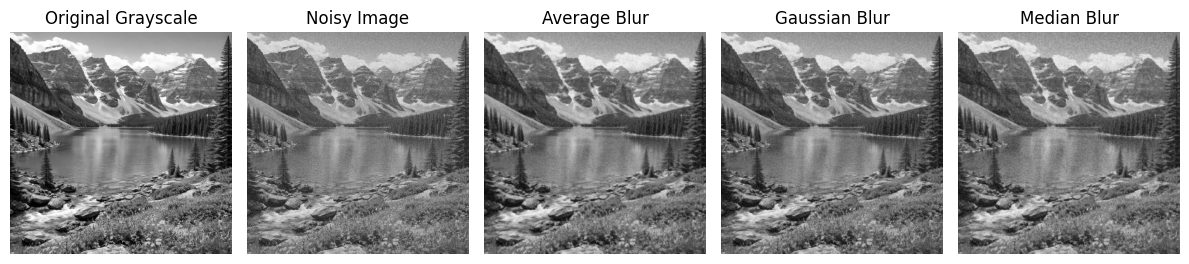

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading image and converting to grayscale
img = cv2.imread('img.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Adding artificial noise to the grayscale image
noise = np.random.randint(0, 256, gray.shape, dtype=np.uint8)
noisy_img = cv2.addWeighted(gray, 0.7, noise, 0.3, 0)

# 2A. Applying Average Blur
avg_blur = cv2.blur(noisy_img, (5, 5))

# 2B. Applying Gaussian Blur
gaussian_blur = cv2.GaussianBlur(noisy_img, (5, 5), 0)

# 2C. Applying Median Blur
median_blur = cv2.medianBlur(noisy_img, 5)

# 3. Displaying all results in one figure
plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
plt.title("Original Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title("Average Blur")
plt.imshow(avg_blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title("Median Blur")
plt.imshow(median_blur, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

A. Which filter handled noise best?

Median Blur, especially for salt-and-pepper noise.

B. Which filter preserved edges better?

Median Blur, because it removes noise without averaging edge pixels

## Q4. Geometric Transformations

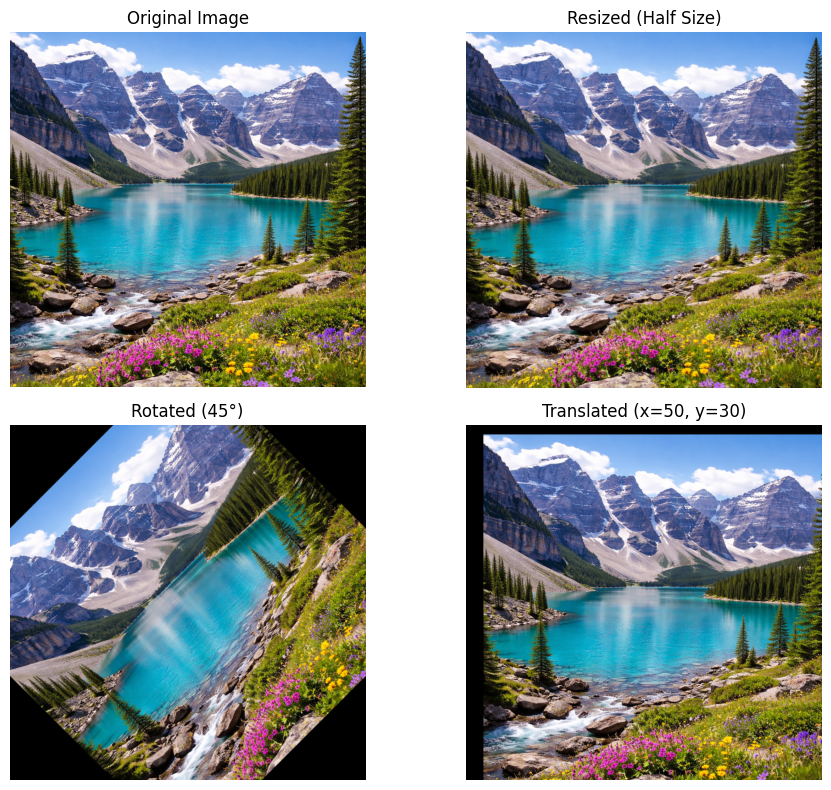

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

h, w = img.shape[:2]

# 1. Resizing the image to half its original size
resized = cv2.resize(img, (w // 2, h // 2), interpolation=cv2.INTER_AREA)

# 2. Rotating the image by 45 degrees about its center
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, rotation_matrix, (w, h))

# 3. Translating the image by (x = 50, y = 30) pixels
translation_matrix = np.float32([[1, 0, 50],
                                 [0, 1, 30]])
translated = cv2.warpAffine(img, translation_matrix, (w, h))

# 4. Displaying all outputs clearly using Matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(resized)
plt.title("Resized (Half Size)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rotated)
plt.title("Rotated (45°)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(translated)
plt.title("Translated (x=50, y=30)")
plt.axis('off')

plt.tight_layout()
plt.show()

Q. Why do geometric transformations often introduce black regions?

Black regions appear because during transformations (rotation, translation, scaling),
some pixels in the output image do not get any corresponding pixel values from the
original image. OpenCV fills these empty areas with a default value (black),
which is known as padding or background filling.

# Part B - Thresholding & Segmentation

## Q5. Manual vs Automatic Thresholding

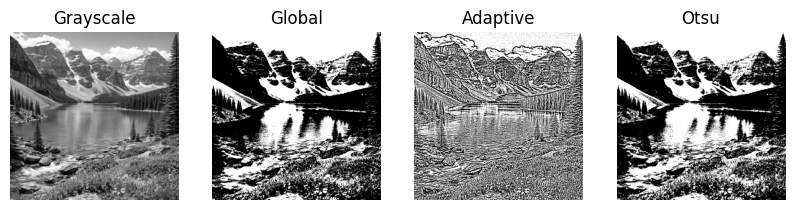

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img.png')
# converting image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Global Thresholding (manual)
_, th_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
th_adaptive = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

# Otsu’s Thresholding
_, th_otsu = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Displaying results
titles = ['Grayscale', 'Global', 'Adaptive', 'Otsu']
images = [gray, th_global, th_adaptive, th_otsu]

plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Q4 Answer:

A. Which method worked best and why?

Otsu’s worked best because it automatically finds an optimal threshold based on image histogram.

B. When would global thresholding fail badly?

B. Global thresholding fails badly when lighting is uneven or the image has varying illumination.

## Q6. Thresholding as Segmentation

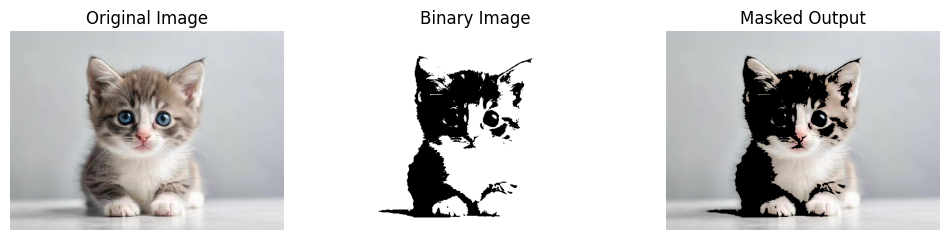

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#1. Uploading image where foreground and background are distinguishable
img = cv2.imread("image.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#2. Using thresholding to isolate the main object
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#3. Creating masked output
mask = binary == 255
masked = np.zeros_like(img_rgb)
masked[mask] = img_rgb[mask]

#3A. Original image
#3B. Binary image
#3C. Masked output
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(masked)
plt.title("Masked Output")
plt.axis("off")

plt.show()


Q. Explain how thresholding acts as segmentation

Thresholding acts as segmentation by separating pixels into foreground and background
based on intensity values. Pixels satisfying the threshold form the object region,
while others are suppressed. This creates a clear partition of the image into
meaningful segments without complex computations.

# Part C - Thinking & Reflection

## Q7. Conceptual Reflection

1. Why is smoothing often applied before thresholding?

Smoothing reduces noise in the image, which prevents small intensity fluctuations from being misclassified as foreground or background. Without smoothing, thresholding may produce a noisy or fragmented binary image.

2. Why is HSV sometimes better than RGB for segmentation?

HSV separates color information (Hue) from intensity (Value), making it easier to segment objects based on color while ignoring lighting variations. RGB mixes color and intensity, so changes in brightness can affect segmentation accuracy.

3. Can histogram equalization negatively affect thresholding? Explain.
 
Yes. Histogram equalization enhances contrast, but it can also exaggerate noise or merge intensity levels, making it harder to choose a proper threshold for segmentation. This is especially problematic if the image already has a clear foreground-background separation.

4. Why does OpenCV prefer built-in functions over manual pixel loops?
 
OpenCV’s built-in functions are highly optimized in C/C++ and use vectorized operations, making them much faster and more memory-efficient than iterating over pixels manually in Python.


# BONUS

## Implementing the pipeline

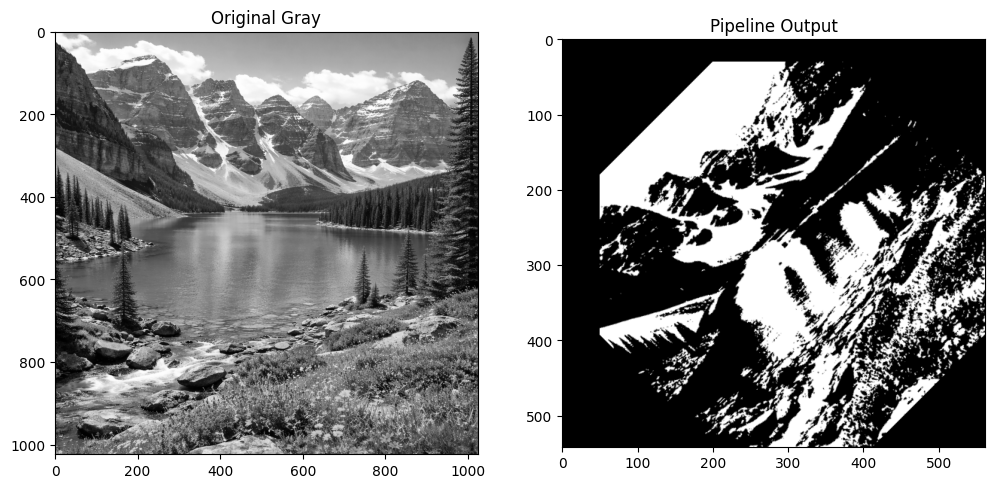

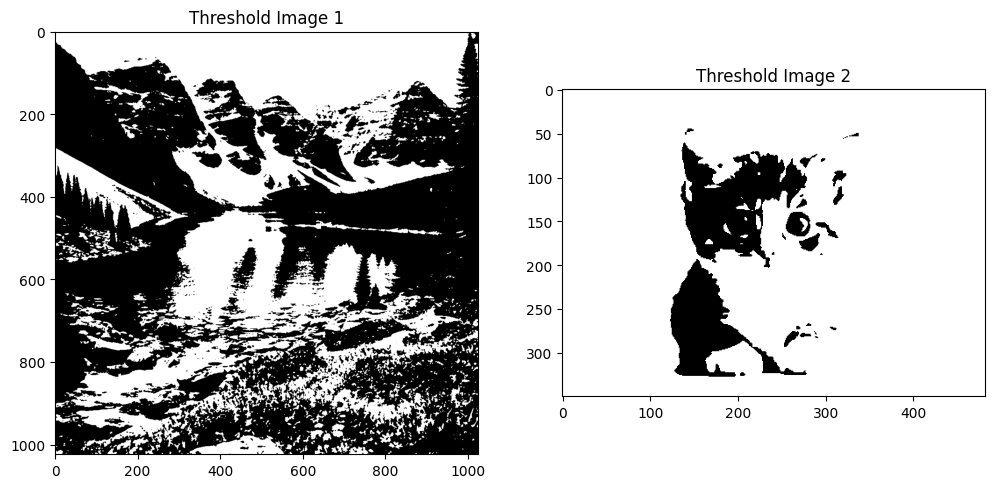


Analysis
- image 1: If the image has varying lighting or low contrast, global thresholding may fail, leaving parts of foreground merged with background.
- Image 2: If the foreground and background are well-contrasted, thresholding isolates objects clearly.
- Conclusion: Thresholding is sensitive to contrast and lighting; adaptive methods might perform better for complex images.



In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Pipeline: Read → Smooth → Threshold → Geometric Transform → Display
# Step 1: Read image
img = cv2.imread('img.png')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Smooth image (Gaussian Blur)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Step 3: Threshold
_, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

# Step 4: Geometric Transform
# Resizing to half
resized = cv2.resize(thresh, (thresh.shape[1]//2, thresh.shape[0]//2))
# Rotating 45 degrees about center
(h, w) = resized.shape
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(resized, M, (w, h))
# Translate by (50,30)
M_trans = np.float32([[1,0,50],[0,1,30]])
translated = cv2.warpAffine(rotated, M_trans, (w+50, h+30))

# Step 5: Displaying
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.title('Original Gray')
plt.subplot(1,2,2), plt.imshow(translated, cmap='gray'), plt.title('Pipeline Output')
plt.show()

# 2. Comparing Thresholding on Two Very Different Images
# Loading second image
img2 = cv2.imread('image.jpeg')  
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
blur2 = cv2.GaussianBlur(gray2, (5,5), 0)
_, thresh2 = cv2.threshold(blur2, 127, 255, cv2.THRESH_BINARY)

# Displaying side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(thresh, cmap='gray'), plt.title('Threshold Image 1')
plt.subplot(1,2,2), plt.imshow(thresh2, cmap='gray'), plt.title('Threshold Image 2')
plt.show()

# Analysis:
print("""
Analysis
- image 1: If the image has varying lighting or low contrast, global thresholding may fail, leaving parts of foreground merged with background.
- Image 2: If the foreground and background are well-contrasted, thresholding isolates objects clearly.
- Conclusion: Thresholding is sensitive to contrast and lighting; adaptive methods might perform better for complex images.
""")
